In [384]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [385]:
#Datasets
net_migration = pd.read_csv("./Cleaned_Dataset/Net_Migration_Data_C.csv")
gdp = pd.read_csv("./Cleaned_Dataset/GDP_C.csv")
gdpPerCap = pd.read_csv("./Cleaned_Dataset/GDPPerCap_C.csv")
inflation = pd.read_csv("./Cleaned_Dataset/Inflation_C.csv")
unemployment = pd.read_csv("./Cleaned_Dataset/Unemployment_C.csv")

In [386]:
net_migration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           53 non-null     int64  
 1   Net Migration  53 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 976.0 bytes


In [387]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    53 non-null     int64  
 1   GDP     41 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 976.0 bytes


In [388]:
gdpPerCap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        53 non-null     int64  
 1   GDP Percap  41 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 976.0 bytes


In [389]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       53 non-null     object 
 1   Inflation  36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 976.0+ bytes


In [390]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          53 non-null     int64  
 1   Unemployment  32 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 976.0 bytes


### Creating the master dataframe

In [391]:
df = pd.DataFrame({
    'Year' : pd.concat([net_migration['Year']], ignore_index = True),
    'Net Migration' : pd.concat([net_migration['Net Migration']], ignore_index = True),
    'GDP' : pd.concat([gdp['GDP']], ignore_index = True),
    'GDP Per Capita' : pd.concat([gdpPerCap['GDP Percap']], ignore_index = True),
    'Inflation' : pd.concat([inflation['Inflation']], ignore_index = True),
    'Unemployment' : pd.concat([unemployment['Unemployment']], ignore_index = True),
})

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            53 non-null     int64  
 1   Net Migration   53 non-null     float64
 2   GDP             41 non-null     float64
 3   GDP Per Capita  41 non-null     float64
 4   Inflation       36 non-null     float64
 5   Unemployment    32 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 2.6 KB


In [393]:
df.isnull().sum()

Year               0
Net Migration      0
GDP               12
GDP Per Capita    12
Inflation         17
Unemployment      21
dtype: int64

## EDA

In [394]:
def lineGraph(df, column, title):
    plt.figure(figsize = (10, 5))
    plt.plot(df['Year'], df[column], color='blue', linestyle='-', marker='o')
    plt.gca().set_facecolor('#F0F0F0')
    plt.legend([column], loc='best')
    plt.xticks(rotation=45)
    plt.xlabel("Year")
    plt.ylabel(column)
    plt.title(title)
    plt.grid(True)
    
    plt.show

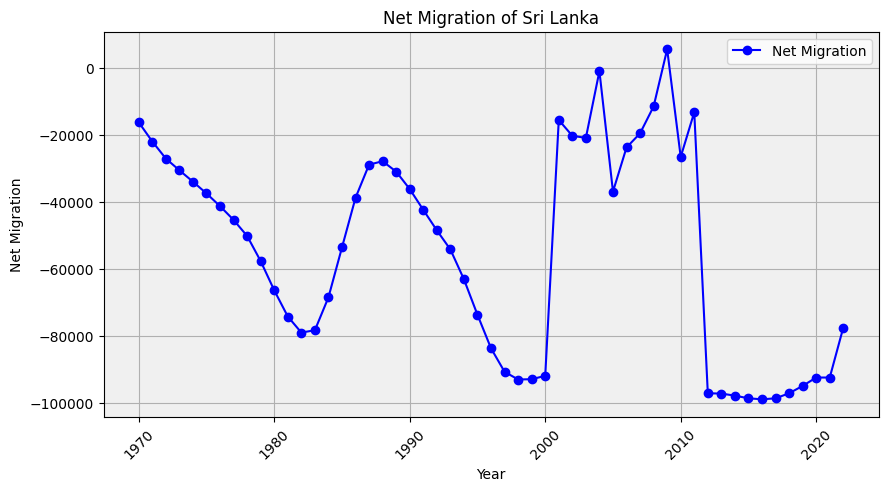

In [395]:
# Net Migration over the years
lineGraph(df, 'Net Migration', 'Net Migration of Sri Lanka')

In [396]:
df['Net Migration'].describe()

count       53.000000
mean    -54821.811321
std      31511.907899
min     -98896.000000
25%     -90691.000000
50%     -50197.000000
75%     -27896.000000
max       5484.000000
Name: Net Migration, dtype: float64

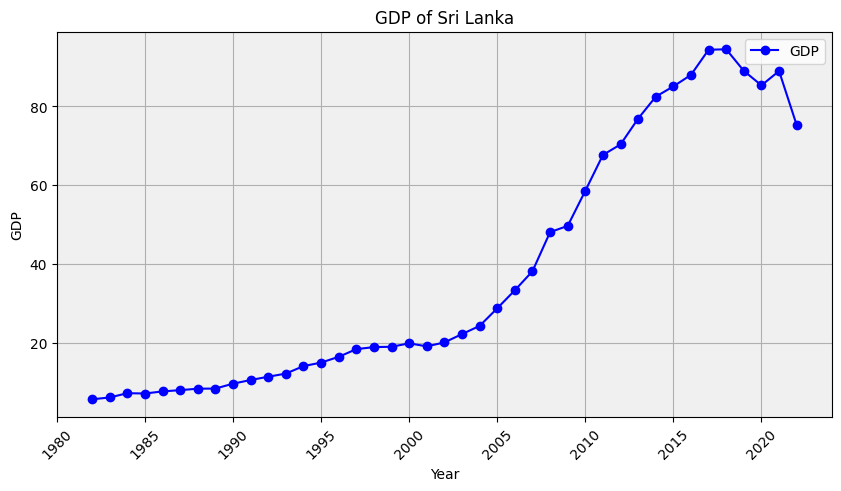

In [397]:
#GDP over the years
lineGraph(df, 'GDP', 'GDP of Sri Lanka')

In [398]:
df['GDP'].describe()

count    41.000000
mean     38.256341
std      31.832239
min       5.830000
25%      11.550000
50%      20.240000
75%      70.390000
max      94.480000
Name: GDP, dtype: float64

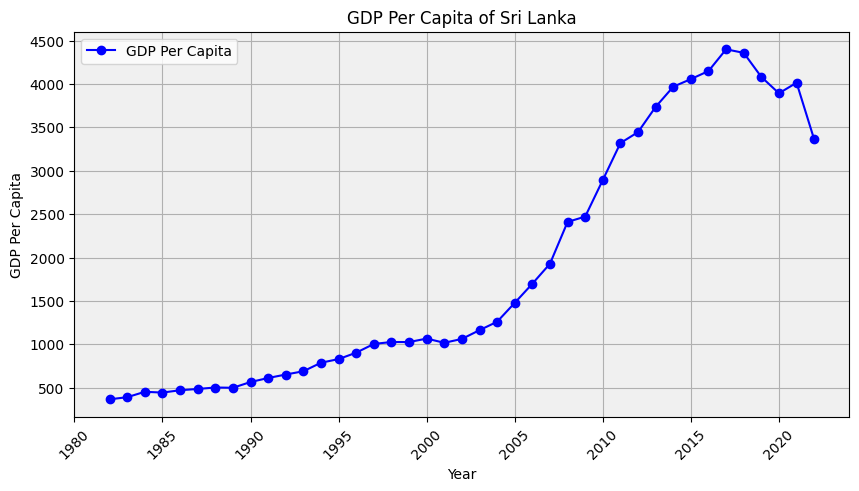

In [399]:
#GDP Per Capita of Sri Lanka over the years
lineGraph(df, 'GDP Per Capita', 'GDP Per Capita of Sri Lanka')

In [400]:
df['GDP Per Capita'].describe()

count      41.000000
mean     1876.676585
std      1443.568891
min       365.500000
25%       651.330000
50%      1065.470000
75%      3362.070000
max      4401.060000
Name: GDP Per Capita, dtype: float64

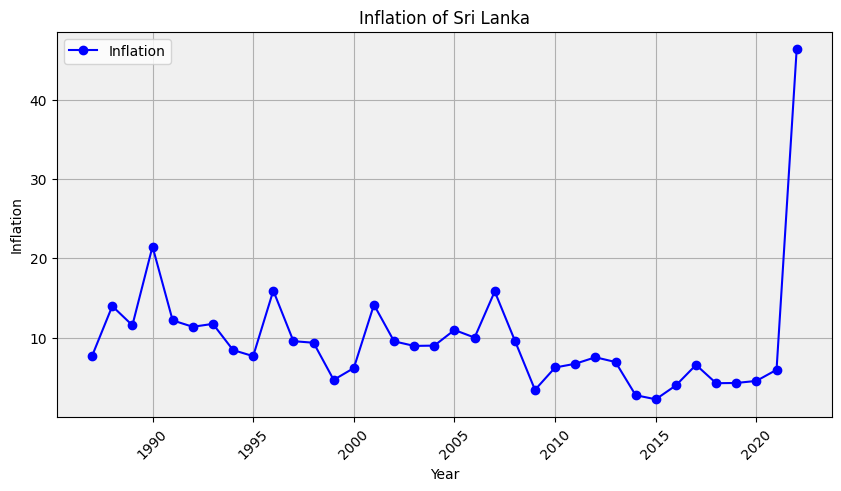

In [401]:
#Inflation of Sri Lanka over the years
lineGraph(df, 'Inflation', 'Inflation of Sri Lanka')

In [402]:
df['Inflation'].describe()

count    36.000000
mean      9.779167
std       7.525509
min       2.240000
25%       6.125000
50%       8.710000
75%      11.427500
max      46.360000
Name: Inflation, dtype: float64

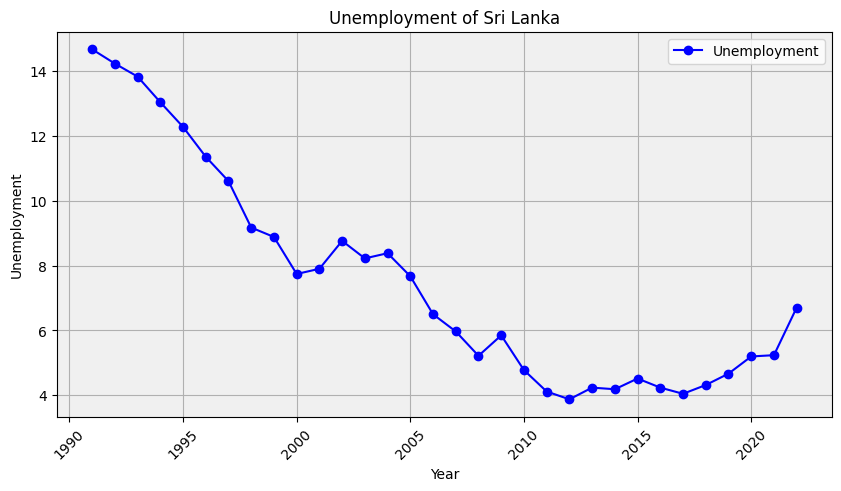

In [403]:
#Unemployement of Sri Lanka over the years
lineGraph(df, 'Unemployment', 'Unemployment of Sri Lanka')

In [404]:
df['Unemployment'].describe()

count    32.000000
mean      7.511375
std       3.347061
min       3.880000
25%       4.632500
50%       6.602500
75%       8.952500
max      14.660000
Name: Unemployment, dtype: float64

### Splitting the Data to Training and Testing

In [405]:
train_percent = 0.85 
train_index = int(len(df) * train_percent)  

train_df = df[:train_index]
test_df = df[train_index:]

In [406]:
train_data

,Year,Net Migration,GDP,GDP Per Capita,Inflation,Unemployment
0,1970,-16297.0,NaN,NaN,NaN,NaN
1,1971,-22014.0,NaN,NaN,NaN,NaN
2,1972,-27097.0,NaN,NaN,NaN,NaN
3,1973,-30602.0,NaN,NaN,NaN,NaN
4,1974,-33995.0,NaN,NaN,NaN,NaN
5,1975,-37505.0,NaN,NaN,NaN,NaN
6,1976,-41298.0,NaN,NaN,NaN,NaN
7,1977,-45398.0,NaN,NaN,NaN,NaN
8,1978,-50197.0,NaN,NaN,NaN,NaN
9,1979,-57696.0,NaN,NaN,NaN,NaN


In [407]:
test_data

,Year,Net Migration,GDP,GDP Per Capita,Inflation,Unemployment
50,2020,-92400.0,85.35,3893.84,4.56,5.200
51,2021,-92400.0,88.98,4016.02,5.96,5.239
52,2022,-77495.0,75.30,3362.07,46.36,6.705


In [408]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import make_pipeline
# from xgboost import XGBRegressor

In [409]:
# models = [make_pipeline(SimpleImputer(), 
#                         RandomForestRegressor(random_state=0, n_estimators=100)),
#           XGBRegressor(random_state=0, n_estimators=100)]

In [410]:
# from mlforecast import MLForecast
# from mlforecast.target_transforms import Differences
# model = MLForecast(models=models,
#                    freq='W',
#                    lags=[1],
#                    target_transforms=[Differences([1])],
#                    num_threads=6)

In [411]:
# dynamic_features = ['GDP', 'GDP Per Capita', 'Inflation', 'Unemployment']
# static_features = []

In [412]:
# # years = train_df['Year'].values.tolist()
# model.fit(train_df, id_col='Year', time_col='Year', target_col='Net Migration', static_features=static_features)
# model.fit(train_df)

In [430]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
train_X = train_df.drop(['Net Migration', 'Year'], axis=1)  # Features for training
train_y = train_df['Net Migration']  # Target variable for training
test_X = test_df.drop(['Net Migration','Year'], axis=1)  # Features for testing
test_y = test_df['Net Migration']  # Target variable for testing

# Convert the data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(train_X, label=train_y)
dtest = xgb.DMatrix(test_X, label=test_y)

# Set the XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Regression objective
    'eval_metric': 'rmse',  # Evaluation metric (Root Mean Squared Error)
    'max_depth': 3,  # Maximum tree depth
    'learning_rate': 0.1,  # Learning rate
    'n_estimators': 100  # Number of boosting iterations
}

# Train the XGBoost model
model = xgb.train(params, dtrain)

[02:17:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimators" } are not used.



In [431]:
# Make predictions on the test set
preds = model.predict(dtest)

# Evaluate the model
mse = mean_squared_error(test_y, preds)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 43097.277192619054


In [432]:
model.save_model('xgboost_model.bin')

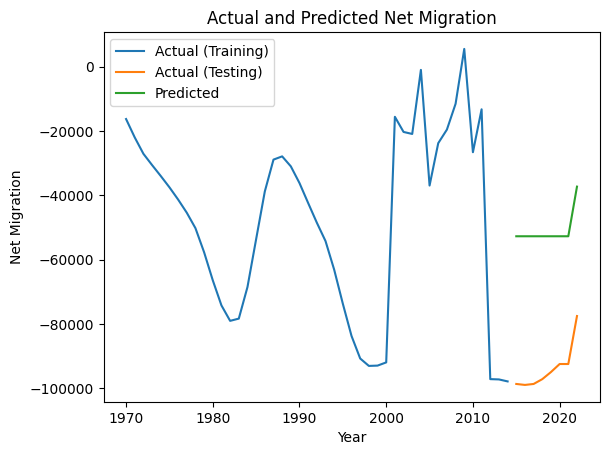

In [433]:
import matplotlib.pyplot as plt

# Plotting the actual training data
plt.plot(train_df['Year'], train_y, label='Actual (Training)')

# Plotting the actual testing data
plt.plot(test_df['Year'], test_y, label='Actual (Testing)')

# Plotting the predicted data
plt.plot(test_df['Year'], preds, label='Predicted')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Net Migration')
plt.title('Actual and Predicted Net Migration')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [435]:
model = xgb.Booster()
model.load_model('xgboost_model.bin')

# Prepare the input features for prediction
years_to_predict = [2023, 2024, 2025]
new_data = pd.DataFrame({
#     'Year': years_to_predict,
    'Net Migration': [0, 0, 0],  # Replace with your input feature values
    'GDP': [70, 75, 80],
    'GDP Per Capita': [3000, 3100, 3800],
    'Inflation': [28.51, 8.69, 5.58],
    'Unemployment': [7, 6, 5]
})

# Make predictions
input_data = xgb.DMatrix(new_data.drop('Net Migration', axis=1))
predictions = model.predict(input_data)

# Create a dataframe to store the predicted values
predictions_df = pd.DataFrame({
    'Year': years_to_predict,
    'Predicted Net Migration': predictions
})

print(predictions_df)

   Year  Predicted Net Migration
0  2023            -37293.359375
1  2024            -35609.449219
2  2025            -52714.179688
